<a href="https://colab.research.google.com/github/VeerVikramSingh/EDA-practice/blob/master/Mental_health_survey_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace."

Introduction
This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis.

Data source and dataset
a. How was it collected?

Name: "Annual Mental Health in Tech Survey"
Sponsoring Organization: Open Sourcing Mental Illness (OSMI)
Year: 2014
Description: "With over 1200 responses, we believe the 2014 Mental Health in Tech Survey was the largest survey done on mental health in the tech industry." Since then, OSMI has conducted two more surveys, 2016 and 2017.
b. Is it a sample? If yes, was it properly sampled?

Yes, it is a sample. We don't have official information about the data collection method, but it appears not to be a random sample, so we can assume that it is not representative.

In [0]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

mh = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/survey.csv")                       # Load in the dataset as mh

Data Profiling

Review the data types and sample data to understand what variables we are dealing with?

Which variables need to be transformed in some way before they can be analyzed?

In [60]:
mh.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [61]:
mh.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [62]:
mh.describe(include="all")

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:43:28,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:

As we can see there is huge discrepancies in Age column of dataset. It is having minimum value as -1726 which in reality is not possible 

on the other hand side the maximum limit is around 99999999 which is not possible either, as the the age can't be less than 0 and till date maximum date recorded is 123.

So we will work on this particular segment of 0-123. For the same we need to clean the data and remove the outliers

In [63]:
mh.sample(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
972,2014-08-29 07:28:17,40,Male,United States,IN,No,Yes,Yes,Rarely,6-25,No,Yes,Don't know,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
1043,2014-08-29 11:20:52,26,Male,United States,WA,No,No,Yes,Sometimes,6-25,No,Yes,Yes,Yes,No,No,Yes,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No,NaN
577,2014-08-27 20:55:48,33,M,United States,MI,No,Yes,No,Sometimes,6-25,Yes,Yes,Don't know,Not sure,No,No,Yes,Very easy,No,No,Some of them,Yes,No,No,Yes,No,NaN
302,2014-08-27 14:20:43,26,Male,United States,MA,No,No,No,Rarely,100-500,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,NaN
507,2014-08-27 16:39:01,32,male,United Kingdom,NaN,No,Yes,Yes,Sometimes,6-25,Yes,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
595,2014-08-27 22:13:55,23,Male,United States,PA,No,No,No,Rarely,100-500,No,Yes,Yes,Not sure,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Some of them,No,No,Yes,No,NaN
519,2014-08-27 17:10:56,34,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,Yes,Very easy,Maybe,Maybe,Yes,Yes,No,No,No,No,NaN
482,2014-08-27 16:19:05,18,Female,United Kingdom,NaN,No,Yes,Yes,Sometimes,1-5,Yes,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Don't know,Maybe,Maybe,Some of them,Some of them,Maybe,Maybe,Don't know,No,I don't have a job :D
712,2014-08-28 10:04:41,30,male,United States,TN,No,Yes,No,Never,100-500,No,Yes,Don't know,No,No,Don't know,Don't know,Very easy,No,No,Some of them,Yes,No,Maybe,Don't know,No,NaN
54,2014-08-27 11:46:36,28,M,Switzerland,NaN,No,No,No,NaN,100-500,No,Yes,No,No,No,No,Don't know,Don't know,No,No,No,No,No,Maybe,Don't know,No,NaN


In [0]:
import pandas_profiling

In [0]:
profile=pandas_profiling.ProfileReport(mh)

In [0]:
profile.to_file(outputfile="EDA_Mental_Preprocess.html")

 Initial observations:

Summary of data types in this dataset:

Numeric: Age (integer)

Object: Everything else

Gender has 49 distinct responses. Group the responses into fewer categories.

Age has some values that are too low or too high to be real ages.

The following variables have null values that may need to addressed.
state: This should be null only when country is something other than the US

self_employed: There are 18 missing values. We need to investigate why.

work-interfere: There are 264 missing values. The question begins with "If you have a mental health condition,..." so lets assume that those who did not respond, did so because they do not have a mental health condition currently. This is an imperfect assumption since we can't know that for sure; and because some people may have felt the need to respond even if they don't have a mental health condition, if they did not feel comfortable they left the question blank.

comments: There are 1095 missing values. It was an optional text box so it's reasonable to expect that many (most) respondents would leave it blank. We may be able to learn something by doing a text analysis on the submitted comments: are there themes that come up in the comments that would inform the next version of the survey - for example, a popular theme might justify creating its own multiple-choice question next time.

In [67]:
print(mh["Age"].min())
print(mh["Age"].max())

-1726
99999999999


In [68]:
mh["Age"].isnull().sum()

0

In [69]:
mh[mh["Age"]>123].count()

Timestamp                    2
Age                          2
Gender                       2
Country                      2
state                        1
self_employed                2
family_history               2
treatment                    2
work_interfere               2
no_employees                 2
remote_work                  2
tech_company                 2
benefits                     2
care_options                 2
wellness_program             2
seek_help                    2
anonymity                    2
leave                        2
mental_health_consequence    2
phys_health_consequence      2
coworkers                    2
supervisor                   2
mental_health_interview      2
phys_health_interview        2
mental_vs_physical           2
obs_consequence              2
comments                     0
dtype: int64

In [70]:
(mh["Age"]>123).value_counts()

False    1257
True        2
Name: Age, dtype: int64

In [71]:
(mh["Age"]<0).value_counts()

False    1256
True        3
Name: Age, dtype: int64

In [72]:
mh[(mh["Age"]>123) | (mh["Age"]<0)]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,Yes,No,Yes,No,Don't know,Yes,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,No,Yes,No,Yes,No,No,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered


In [73]:
print(len(set(mh["Gender"])))
print(set(mh["Gender"]))

49
{'Female (cis)', 'f', 'Femake', 'Androgyne', 'F', 'M', 'Mail', 'Cis Female', 'Trans woman', 'queer/she/they', 'Male', 'Female (trans)', 'All', 'non-binary', 'Neuter', 'female', 'woman', 'cis male', 'ostensibly male, unsure what that really means', 'm', 'something kinda male?', 'Agender', 'Woman', 'male', 'Female', 'cis-female/femme', 'p', 'A little about you', 'Male (CIS)', 'Trans-female', 'Nah', 'Female ', 'Guy (-ish) ^_^', 'male leaning androgynous', 'queer', 'Genderqueer', 'Enby', 'msle', 'fluid', 'femail', 'Male-ish', 'maile', 'Man', 'Cis Man', 'Male ', 'Make', 'Malr', 'Mal', 'Cis Male'}


Final observations

Variables to transform prior to analysis:

Standardize all column headers to lower case (to prevent typos!)

Timestamp: convert to datetime

Age: remove outliers as it is visible that the age column have two outliers as 329, 999999999999, -1, -1729 and -29.

Gender: group into standardized categories

It will be important to decide how to handle NaN values

In [0]:
mh.columns=map(str.lower,mh.columns)

In [0]:
mh["timestamp"]=pd.to_datetime(mh["timestamp"])

In [76]:
mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
timestamp                    1259 non-null datetime64[ns]
age                          1259 non-null int64
gender                       1259 non-null object
country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-

Missing Data and its Imputation:

In [77]:
total=mh.isnull().sum()
percentage=(mh.isnull().sum())/(mh.isnull().count())
pd.concat([total,percentage],axis=1,keys=["Total","Percent"])

,Total,Percent
timestamp,0,0.000000
age,0,0.000000
gender,0,0.000000
country,0,0.000000
state,515,0.409055
self_employed,18,0.014297
family_history,0,0.000000
treatment,0,0.000000
work_interfere,264,0.209690
no_employees,0,0.000000


In [78]:
mh.drop("comments",axis=1)
mh.drop("timestamp",axis=1)

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


Outlier Treatment:

For the purpose of this analysis, simply replace any out-of-range age values with "NaN", rather than deleting the rows from the data set.

 In a more detailed analysis it could be worth looking more closely at the rows with out-of-range ages and deciding whether it makes more sense to remove them.

As we recall the age column had 5 outliers, 3 below zero and 2 above 123. Let us see how to handle them.

In [0]:
def clean_age(age):
  if age>=0 and age<=123:
    return age
  else:
    return np.NAN

In [0]:
mh["age"]=mh["age"].apply(clean_age)

In [81]:
print(mh["age"].min())
print(mh["age"].max())
print(mh["age"].isnull().sum())

5.0
72.0
5


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
mh["age_group"]=pd.cut(mh["age"].dropna(),[0,18,25,35,45,90],labels=["<18","18-24","25-34","35-44","45+"])

In [83]:
mh["age_group"].head()

0    35-44
1    35-44
2    25-34
3    25-34
4    25-34
Name: age_group, dtype: category
Categories (5, object): [<18 < 18-24 < 25-34 < 35-44 < 45+]

How does age relate to various behaviors and/or their awareness of their employer's attitude toward mental health?

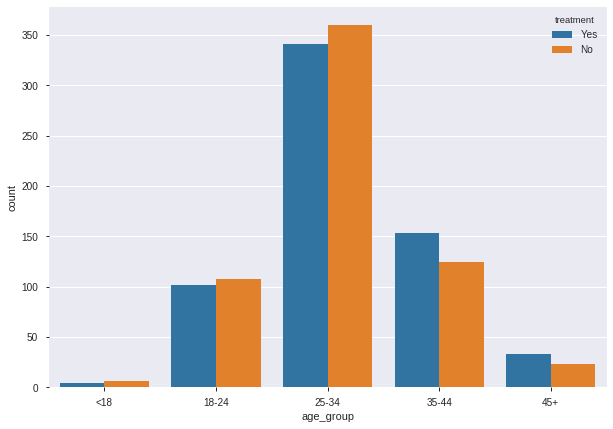

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,7))
sns.countplot(x="age_group",hue="treatment",data=mh)

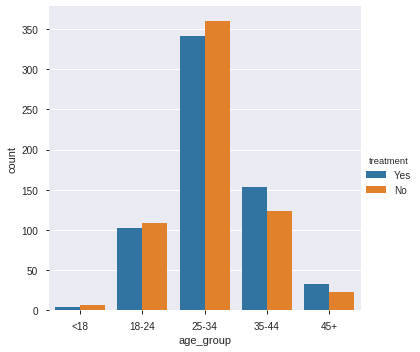

In [85]:
sns.factorplot("age_group",data=mh,hue="treatment",kind="count")

In [86]:
mh["age"].head()

0    37.0
1    44.0
2    32.0
3    31.0
4    31.0
Name: age, dtype: float64

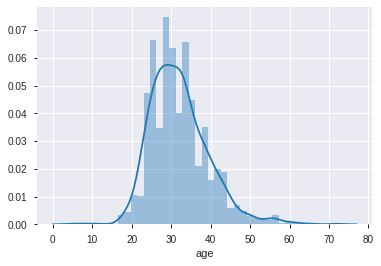

In [87]:
sns.distplot(mh["age"].dropna())

Handling NaN data in the categorical columns

There are three variables with many missing values. None of them points to a need to "fill in" the missing responses or delete the rows.

 More detail:

state: the missing values are likely to occur in the instances where the country is not "United States".

work_intefere: the missing values indicate that the respondent skipped the question because it does not apply to them, which is important information. We can infer that missing responses means the respondent is not experiencing a mental illness at the moment.

self_employed: there are 18 missing values and it indicates the respondent may have left the column, as this column so it hold much of a importance to analysis, So it's better to impute with values in order to make the data normal.

In [0]:
mh["work_interfere"].fillna(mh["work_interfere"].mode()[0],inplace=True)
mh["self_employed"].fillna(mh["self_employed"].mode()[0],inplace=True)

In [89]:
print(mh["work_interfere"].unique())
print(mh["self_employed"].unique())

['Often' 'Rarely' 'Never' 'Sometimes']
['No' 'Yes']


In [90]:
mh["gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [0]:
mh["gender"]=mh["gender"].str.lower

In [92]:
mh["gender"]

0       <bound method _noarg_wrapper.<locals>.wrapper ...
1       <bound method _noarg_wrapper.<locals>.wrapper ...
2       <bound method _noarg_wrapper.<locals>.wrapper ...
3       <bound method _noarg_wrapper.<locals>.wrapper ...
4       <bound method _noarg_wrapper.<locals>.wrapper ...
                              ...                        
1254    <bound method _noarg_wrapper.<locals>.wrapper ...
1255    <bound method _noarg_wrapper.<locals>.wrapper ...
1256    <bound method _noarg_wrapper.<locals>.wrapper ...
1257    <bound method _noarg_wrapper.<locals>.wrapper ...
1258    <bound method _noarg_wrapper.<locals>.wrapper ...
Name: gender, Length: 1259, dtype: object

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
mh_new=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/survey.csv")

In [95]:
mh_new["Gender"].head()

0    Female
1         M
2      Male
3      Male
4      Male
Name: Gender, dtype: object

In [96]:
mh.drop(["gender"],axis=1)

,timestamp,age,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_group
0,2014-08-27 11:29:31,37.0,United States,IL,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,35-44
1,2014-08-27 11:29:37,44.0,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN,35-44
2,2014-08-27 11:29:44,32.0,Canada,NaN,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN,25-34
3,2014-08-27 11:29:46,31.0,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,25-34
4,2014-08-27 11:30:22,31.0,United States,TX,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26.0,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN,25-34
1255,2015-09-26 01:07:35,32.0,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN,25-34
1256,2015-11-07 12:36:58,34.0,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN,25-34
1257,2015-11-30 21:25:06,46.0,United States,NC,No,No,No,Sometimes,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN,45+


In [0]:
mh["gender"]=mh_new["Gender"].copy()

In [98]:
mh["gender"].head()

0    Female
1         M
2      Male
3      Male
4      Male
Name: gender, dtype: object

In [0]:
gender=mh["gender"].str.lower()

In [100]:
mh["gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [0]:
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
for (row,col) in mh.iterrows():
  if str.lower(col.gender) in male_str:
    mh["gender"].replace(to_replace=col.gender,value="male",inplace=True)
  if str.lower(col.gender) in trans_str:
    mh["gender"].replace(to_replace=col.gender,value="trans",inplace=True)
  if str.lower(col.gender) in female_str:
    mh["gender"].replace(to_replace=col.gender,value="female",inplace=True)

In [102]:
mh["gender"].unique()

array(['female', 'male', 'trans', 'A little about you', 'p'], dtype=object)

In [0]:
others_str=["A little about you","p"]
mh=mh[~(mh["gender"]).isin (others_str)]

In [104]:
mh["gender"].unique()

array(['female', 'male', 'trans'], dtype=object)

In [105]:
col.gender

'Male'

In [106]:
mh.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_group
0,2014-08-27 11:29:31,37.0,female,United States,IL,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,35-44
1,2014-08-27 11:29:37,44.0,male,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN,35-44
2,2014-08-27 11:29:44,32.0,male,Canada,NaN,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN,25-34
3,2014-08-27 11:29:46,31.0,male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,25-34
4,2014-08-27 11:30:22,31.0,male,United States,TX,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,25-34


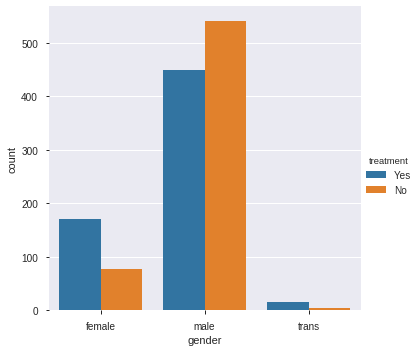

In [107]:
sns.factorplot(x="gender",hue="treatment",kind="count",data=mh)

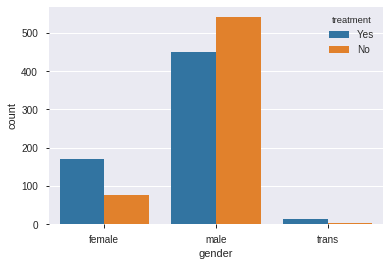

In [108]:
sns.countplot(x="gender",hue="treatment",data=mh)

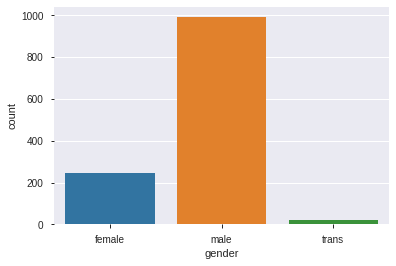

In [109]:
sns.countplot(mh["gender"])

Text(0.5, 1.0, 'treatment (trans)')

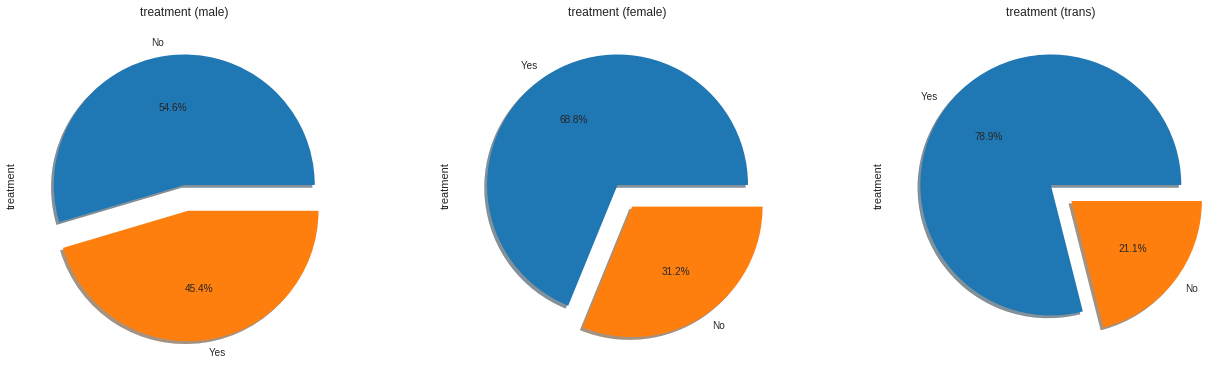

In [110]:
f,ax = plt.subplots(1,3,figsize=(22,6))
mh['treatment'][mh['gender'] == 'male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
mh['treatment'][mh['gender'] == 'female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
mh['treatment'][mh['gender'] == 'trans'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('treatment (male)')
ax[1].set_title('treatment (female)')
ax[2].set_title('treatment (trans)')

In [111]:
mh["treatment"][mh["gender"]=="male"].value_counts()

No     541
Yes    450
Name: treatment, dtype: int64

In [112]:
print(mh["treatment"][mh["gender"]=="female"].value_counts())
print(mh["treatment"][mh["gender"]=="trans"].value_counts())

Yes    170
No      77
Name: treatment, dtype: int64
Yes    15
No      4
Name: treatment, dtype: int64


Observations
Female and trans is more affected than males in ratio terms 

In [113]:
mh.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_group
0,2014-08-27 11:29:31,37.0,female,United States,IL,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,35-44
1,2014-08-27 11:29:37,44.0,male,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN,35-44
2,2014-08-27 11:29:44,32.0,male,Canada,NaN,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN,25-34
3,2014-08-27 11:29:46,31.0,male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,25-34
4,2014-08-27 11:30:22,31.0,male,United States,TX,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,25-34


In [114]:
mh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 1258
Data columns (total 28 columns):
timestamp                    1257 non-null datetime64[ns]
age                          1253 non-null float64
gender                       1257 non-null object
country                      1257 non-null object
state                        742 non-null object
self_employed                1257 non-null object
family_history               1257 non-null object
treatment                    1257 non-null object
work_interfere               1257 non-null object
no_employees                 1257 non-null object
remote_work                  1257 non-null object
tech_company                 1257 non-null object
benefits                     1257 non-null object
care_options                 1257 non-null object
wellness_program             1257 non-null object
seek_help                    1257 non-null object
anonymity                    1257 non-null object
leave                        1257 n

In [115]:
from sklearn.preprocessing import LabelEncoder
mh_new=mh.copy(deep=True)
mh_new.apply(LabelEncoder().fit_transform)

TypeError: ignored

In [117]:
number=LebelEncoder()
for i in mh_new.columns:

  mh_new.apply(LabelEncoder().fit_transform(mh_new[i].astype(str)))

NameError: ignored

In [0]:
for i in mh_new.columns:
  mh_new[i]=LabelEncoder().fit_transform(mh_new[i].astype(str))

In [118]:
mh_new.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_group
0,0,20,0,44,10,0,0,1,1,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0,155,2
1,1,27,1,44,11,0,0,0,2,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,155,2
2,2,15,1,6,45,0,0,0,2,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0,155,1
3,3,14,1,43,45,0,1,1,1,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1,155,1
4,4,14,1,44,37,0,0,0,0,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0,155,1


In [119]:
mh_new[i]

0       2
1       2
2       1
3       1
4       1
       ..
1254    1
1255    1
1256    1
1257    3
1258    0
Name: age_group, Length: 1257, dtype: int64

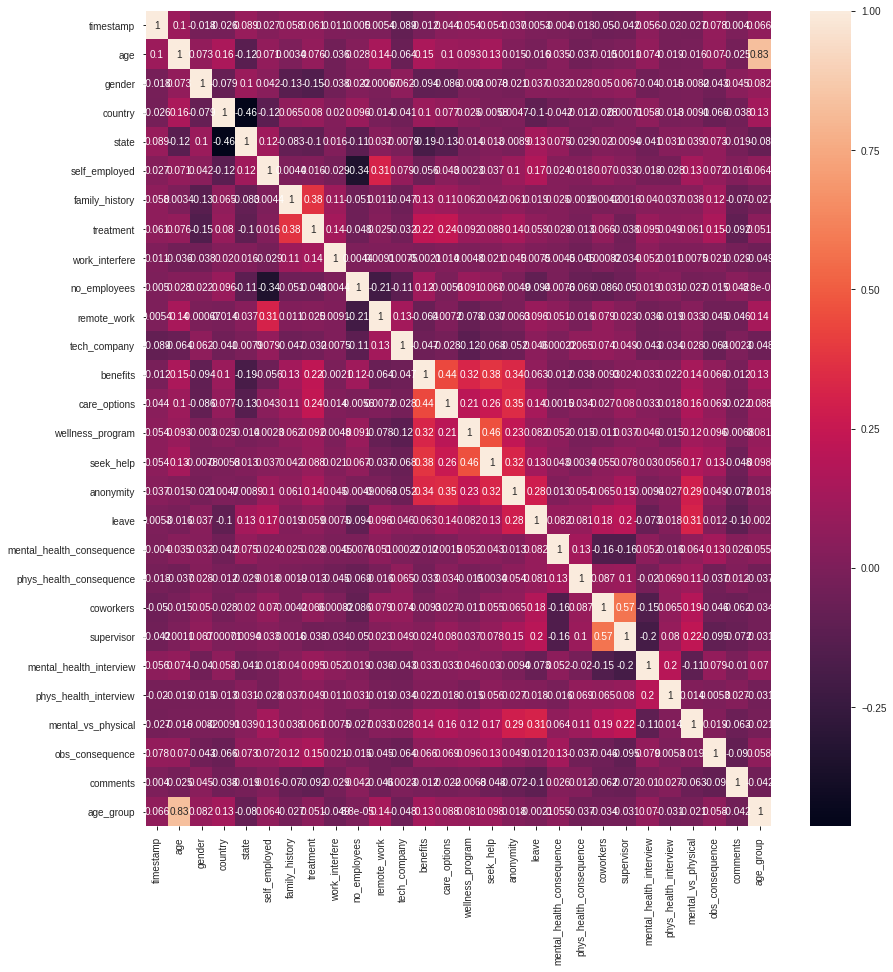

In [120]:
plt.figure(figsize=(14,15))
sns.heatmap(mh_new.corr(),annot=True)

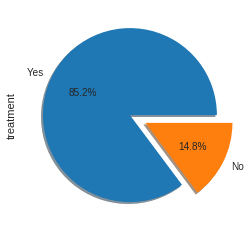

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
mh["treatment"][mh["work_interfere"]=="Often"].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True)

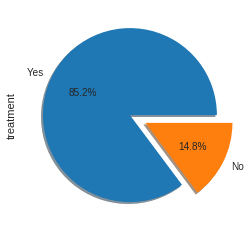

In [122]:
mh["treatment"][mh["work_interfere"]=="Often"].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True)

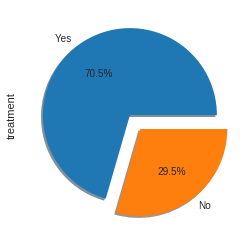

In [123]:
mh["treatment"][mh["work_interfere"]=="Rarely"].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True)

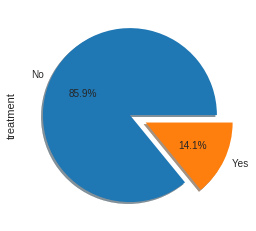

In [124]:
mh["treatment"][mh['work_interfere']=="Never"].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True)

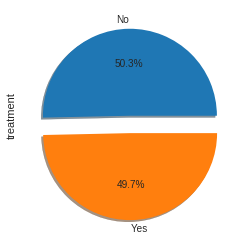

In [125]:
mh["treatment"][mh['work_interfere']=="Sometimes"].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True)

Observation:

So the employees who are "Often" and "Rarely" interferred during their work are more likely to have mental health issue and they tend to go for treatment.

Age Category v. seeking treatment

Whether an employee is seeking treatment for a mental health condition appears to be correlated with their knowledge of their employer's mental health benefits.

In [126]:
mh.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_group
0,2014-08-27 11:29:31,37.0,female,United States,IL,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,35-44
1,2014-08-27 11:29:37,44.0,male,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN,35-44
2,2014-08-27 11:29:44,32.0,male,Canada,NaN,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN,25-34
3,2014-08-27 11:29:46,31.0,male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,25-34
4,2014-08-27 11:30:22,31.0,male,United States,TX,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,25-34


In [127]:
mh["age_group"][mh["treatment"].value_counts()]

635    25-34
622    25-34
Name: age_group, dtype: category
Categories (5, object): [<18 < 18-24 < 25-34 < 35-44 < 45+]

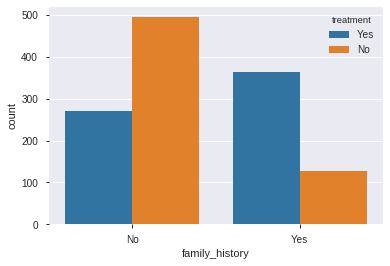

In [128]:
sns.countplot(x="family_history",hue="treatment",data=mh)

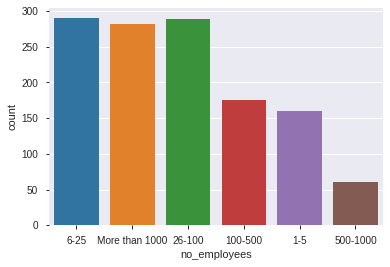

In [129]:
sns.countplot(x="no_employees",data=mh)

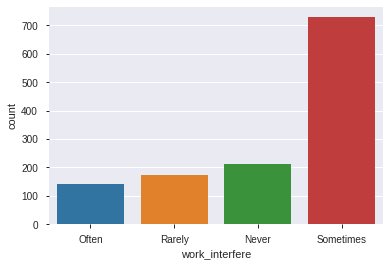

In [130]:
sns.countplot(x="work_interfere",data=mh)

to check relation b/w employee count and treatment:

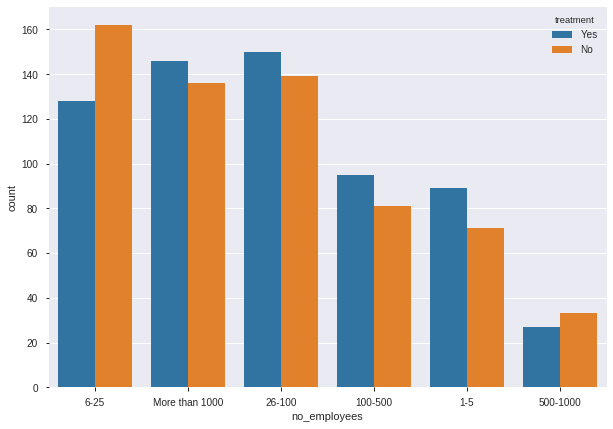

In [133]:
plt.figure(figsize=(10,7))
sns.countplot(x="no_employees",hue="treatment",data=mh)

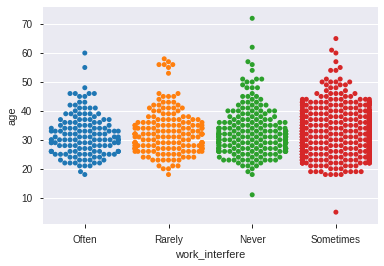

In [132]:
sns.swarmplot(x="work_interfere",y="age",data=mh)

Observation

Workers of age range between 25-40 years are interfered in their work "sometimes" for the maximum number of time

In [134]:
mh_.head()

NameError: ignored

In [135]:
mh_new.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_group
0,0,20,0,44,10,0,0,1,1,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0,155,2
1,1,27,1,44,11,0,0,0,2,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,155,2
2,2,15,1,6,45,0,0,0,2,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0,155,1
3,3,14,1,43,45,0,1,1,1,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1,155,1
4,4,14,1,44,37,0,0,0,0,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0,155,1


In [0]:
for i in mh_new.columns:
  mh[i]=LabelEncoder().fit_transform(mh[i].astype(str))

In [137]:
mh_new.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_group
0,0,20,0,44,10,0,0,1,1,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0,155,2
1,1,27,1,44,11,0,0,0,2,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,155,2
2,2,15,1,6,45,0,0,0,2,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0,155,1
3,3,14,1,43,45,0,1,1,1,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1,155,1
4,4,14,1,44,37,0,0,0,0,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0,155,1


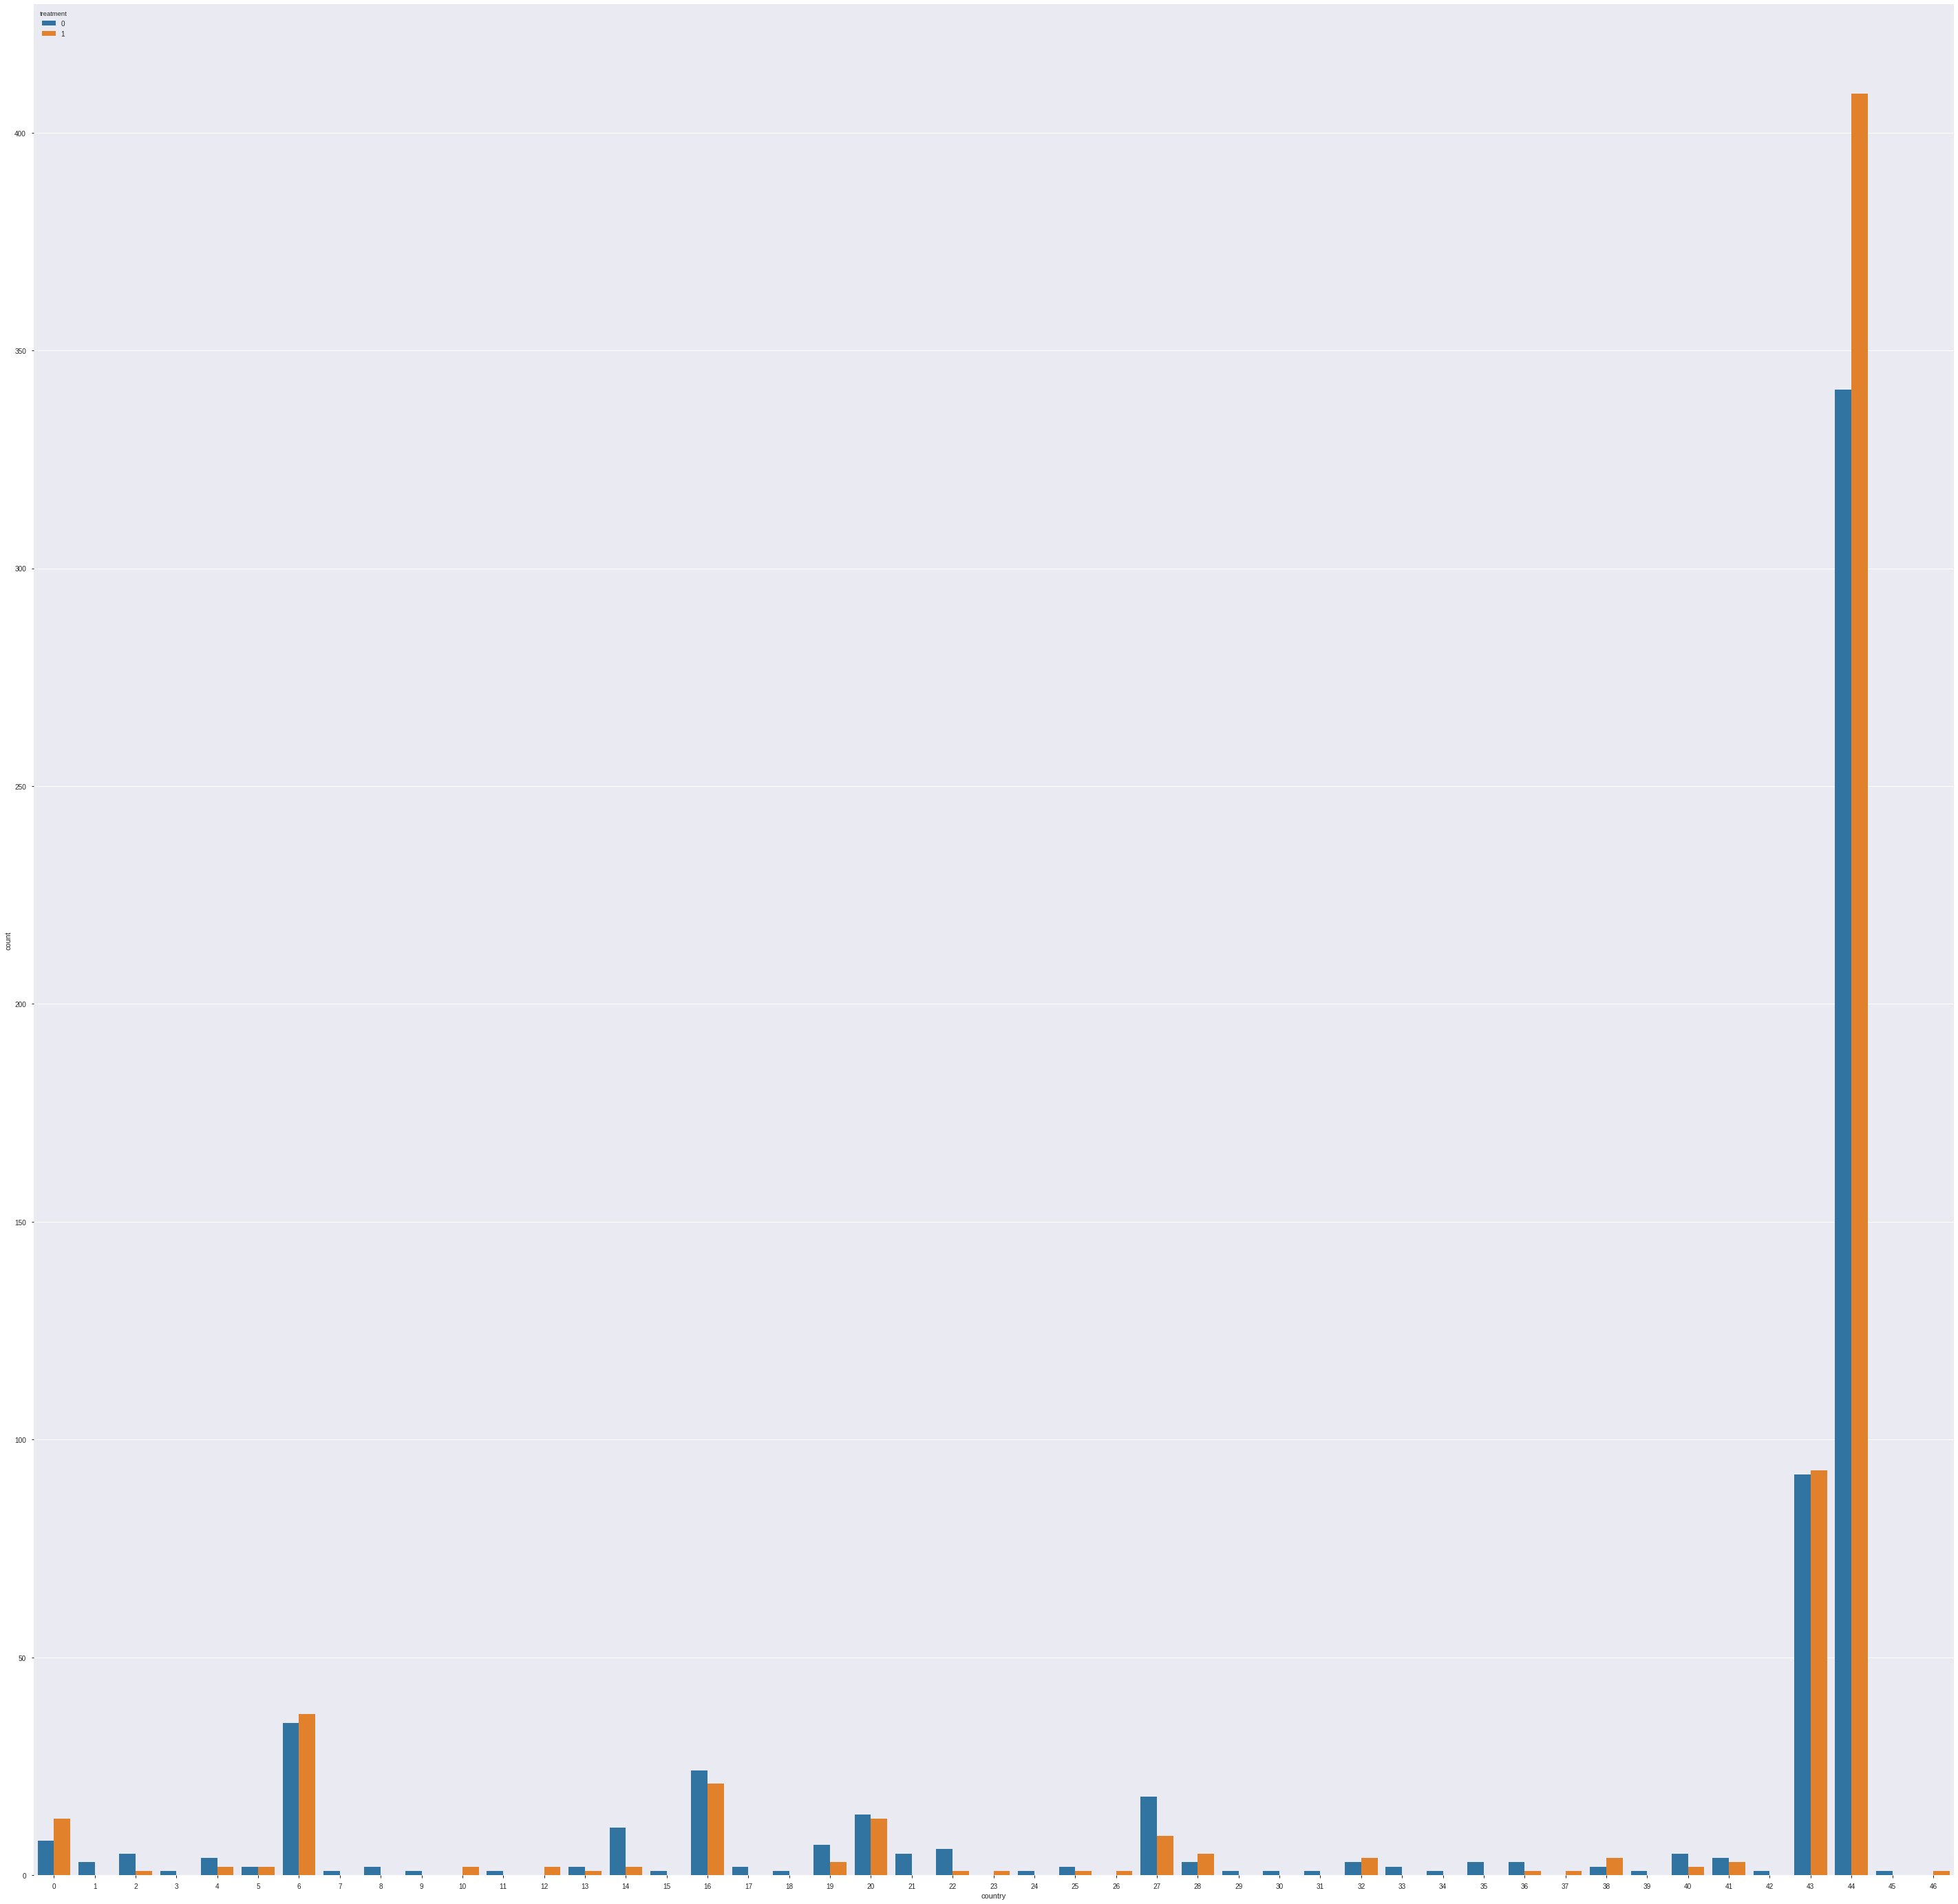

In [138]:
plt.figure(figsize=(50,50))
sns.countplot("country",hue="treatment",data=mh_new)

In [0]:
usa=mh.loc[mh["country"]=="United States"]

In [140]:
usa["state"].value_counts()[:10].to_frame()

,state


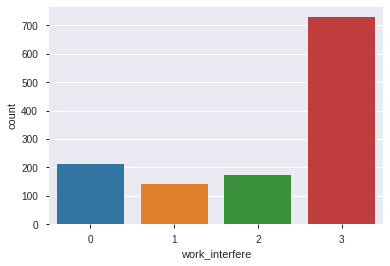

In [141]:
sns.countplot("work_interfere",data=mh_new)

In [142]:
mh.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_group
0,0,20,0,44,10,0,0,1,1,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0,155,2
1,1,27,1,44,11,0,0,0,2,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,155,2
2,2,15,1,6,45,0,0,0,2,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0,155,1
3,3,14,1,43,45,0,1,1,1,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1,155,1
4,4,14,1,44,37,0,0,0,0,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0,155,1


In [143]:
sns.countplot(x=countries["work_interfere"],order=["often","rerely","never","sometimes"],data=mh)

NameError: ignored

In [0]:
countries=pd.concat([mh_new.loc[mh_new["country"]=="United States"],mh_new.loc[mh_new["country"]=="Canada"],mh_new.loc[mh_new["country"]=="United Kingdom"]]).reset_index(drop=True)

In [171]:
countries.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_group


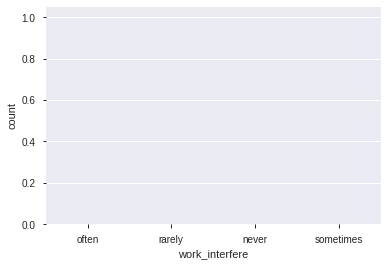

In [148]:
sns.countplot(x=countries["work_interfere"],order=["often","rarely","never","sometimes"])

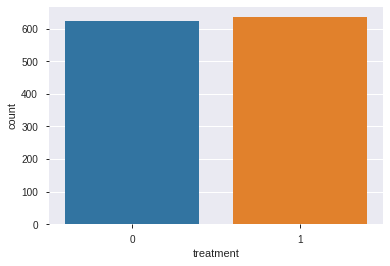

In [149]:
sns.countplot("treatment",data=mh)

In [0]:
countries = pd.concat([mh.loc[mh['country']=='Canada'],mh.loc[mh['country']=='United States'],mh.loc[mh['country']=='United Kingdom']]).reset_index(drop=True)

In [172]:
sns.countplot(countries["treatment"])

ValueError: ignored

In [167]:
countries["treatment"].value_counts()

Series([], Name: treatment, dtype: int64)

In [157]:
countries.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_group


In [173]:
mh.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_group
0,0,20,0,44,10,0,0,1,1,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0,155,2
1,1,27,1,44,11,0,0,0,2,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,155,2
2,2,15,1,6,45,0,0,0,2,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0,155,1
3,3,14,1,43,45,0,1,1,1,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1,155,1
4,4,14,1,44,37,0,0,0,0,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0,155,1


In [0]:
for i in mh.columns:
  mh[i]=LabelEncoder().fit_transform(mh[i].astype(int))

In [178]:
mh.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_group
0,0,13,0,39,2,0,0,1,1,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0,63,2
1,1,20,1,39,3,0,0,0,2,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,63,2
2,356,7,1,43,40,0,0,0,2,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0,63,1
3,467,6,1,38,40,0,1,1,1,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1,63,1
4,578,6,1,39,31,0,0,0,0,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0,63,1
